# Проект: Принятие решений в бизнесе

# Описание проекта
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Цели проекта:
1. Приоритизировать гипотез.
2. Запустить A/B-тест и проанализирвоать результаты.

# Описание данных

# Данные для первой части
__Структура /datasets/hypothesis.csv:__  

`Hypothesis` — краткое описание гипотезы;  
`Reach` — охват пользователей по 10-балльной шкале;  
`Impact` — влияние на пользователей по 10-балльной шкале;  
`Confidence` — уверенность в гипотезе по 10-балльной шкале;  
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

# Данные для второй части

__Структура /datasets/orders.csv:__  

`transactionId` — идентификатор заказа;  
`visitorId` — идентификатор пользователя, совершившего заказ;  
`date` — дата, когда был совершён заказ;  
`revenue` — выручка заказа;  
`group` — группа A/B-теста, в которую попал заказ.  

__Структура /datasets/visitors.csv:__  

`date` — дата;  
`group` — группа A/B-теста;  
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

## Приоритезация гипотез.

### Импорт библитек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Считывание данных из файла

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

### Обзор таблицы `hypothesis`

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
# названия столбцов записаны с заглавной буквы, необходимо привести их к нижнему регистру для удобства рыботы с таблицей
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
hypothesis.head(10)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [6]:
#текст внутри столбца с гипотезами не помещается целиком, поэтому необходимо увеличить ширину столбцов
pd.set_option('display.max_colwidth', 150)
hypothesis.head(10)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применим фреймворк ICE для приоритизации гипотез, отсортируем их по убыванию приоритета.

In [7]:
hypothesis['ICE'] = round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 2)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending= False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Применив фреймфорк ICE следующие гипотезы оказались наиболее приоритетными:
1. Запустить акцию, дающую скидку на товар в день рождения.
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

### Применим фреймворк RICE для приоритизации гипотез, отсортируем их по убыванию приоритета.

In [8]:
hypothesis['RICE'] = round(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 2)
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending= False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Применив фреймфорк RICE следующие гипотезы оказались наиболее приоритетными:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

In [9]:
tmp = hypothesis[['hypothesis','ICE', 'RICE']].sort_values(by='hypothesis', ascending=False).head(10)
cm = sns.light_palette("green", as_cmap=True)
tmp.style.background_gradient(cmap=cm)

,hypothesis,ICE,RICE
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.120000,9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.330000,4.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.330000,40.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000


## Вывод по приоритезации гипотез:
1. Применив фреймфорк ICE следующие гипотезы оказались наиболее приоритетными:
    * Запустить акцию, дающую скидку на товар в день рождения.
    * Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
    * Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
    
2. Применив фреймфорк RICE следующие гипотезы оказались наиболее приоритетными:
    * Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
    * Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
    * Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
    
Различия в приоритезации гипотез обусловено параметром охвата аудитории (reach), который используется в расчетах RICE.

## Анализ A/B-теста.

### Импорт библиотек

In [10]:
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stp

### Считывание данных из файла

In [11]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

### Обзор таблицы `orders`

In [12]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
orders.duplicated().sum()

0

In [14]:
#переименуем столбцы transactionId и visitorId      
orders = orders.rename (columns={'transactionId' : 'transaction_id', 'visitorId' : 'visitor_id'})

In [15]:
#необходимо изменть формат столбца date с Object На datetime
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


### Обзор таблицы `visitors`

In [16]:
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [17]:
visitors.duplicated().sum()

0

In [18]:
#необходимо изменть формат столбца date с Object На datetime
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Проверка попадания пользователей в обе группы

In [19]:
duplicate_users = np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique())
duplicate_users

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

В обе группы попало не мало пользователей, необходимо удалить из таблицы таких пользователей.

In [20]:
orders = orders[~orders['visitor_id'].isin(duplicate_users)]
np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique())

array([], dtype=int64)

Вывод по ознакомлению с таблицами:
1. В таблицах не было обнаружено проущенных занчений или дубликатов.
2. В таблице orders были переименованы столбцы transactionId и visitorId в transaction_id и visitor_id.
3. В стобцах data в таблицах orders и visitors были мзменены типы данных с object на datetime.
4. Была проведена проверка попадания пользователей в обе группы. Такие пользователи (попавшие в обе группы) были удалены из таблицы.

### Подготовка кумулятивных данных.

In [21]:
#создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

#получаем агрегированные кумулятивные данные по дням о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'transaction_id' : 'nunique', 
            'visitor_id' : 'nunique', 'revenue' : 'sum'
        }
    ), 
    axis=1
).sort_values(by=['date','group'])

#получаем агрегированные кумулятивные данные по дням о посетителях
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'visitors' : 'sum'}), 
    axis=1
).sort_values(by=['date','group'])

#объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


### Построим график кумулятивной выручки по группам.

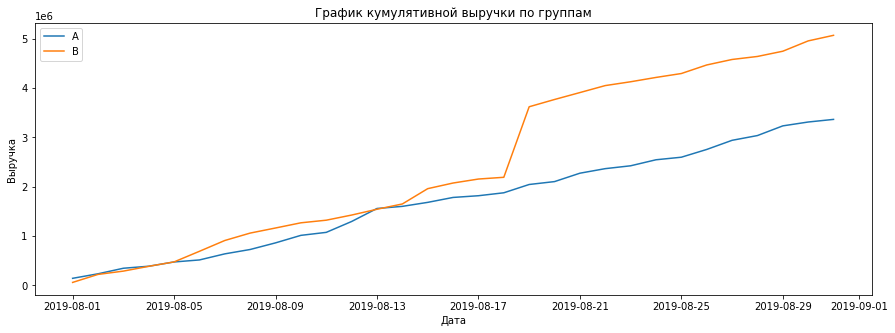

In [22]:
#датафрейм с кумулятивным выручкой и количеством заказов по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

#датафрейм с кумулятивным выручкой и количеством заказов по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 5))
#график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

#график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.show()

Почти до середины теста данные о выручке в целом одинаковы, но во второй половине теста выручка в группе В резко стала выше. Возможно это связано с увеличением количества заказов или с формированием более дорогих заказов.

### Построим график кумулятивного среднего чека по группам.

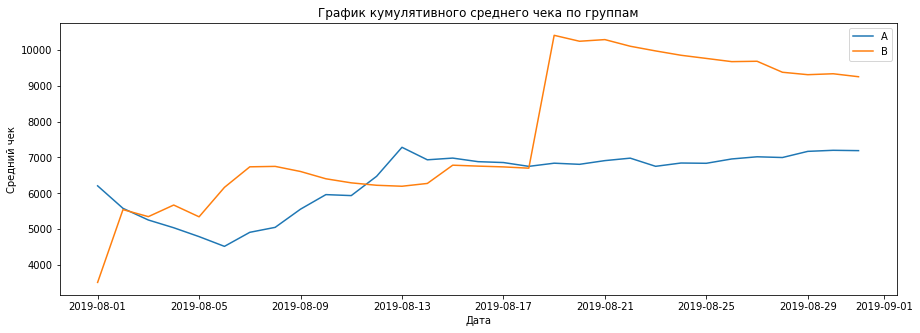

In [23]:
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Cредний чек')
plt.legend()
plt.show()

По графику кумулятивного среднего чека можно сделать следующие выводы:
1. К концу теста оба графика выравниваются.
2. График группы В примерно в середине теста (19 число) имеет аномальный резкий скачек (возможно это связано с каким-то крпным заказом).
3. График группы А более плавный, чем график группы В.

### Построbv график относительного изменения кумулятивного среднего чека группы B к группе A.

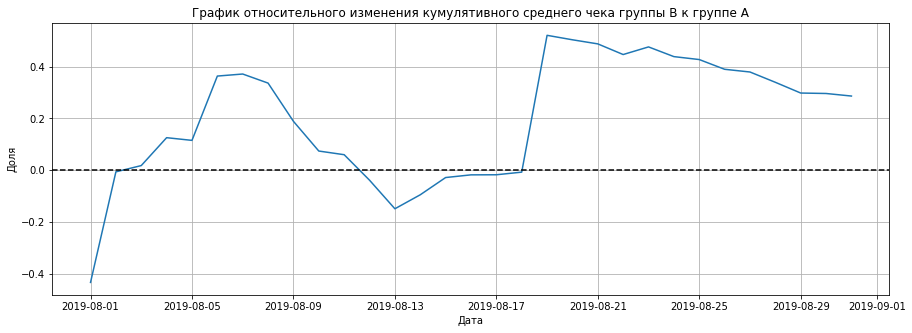

In [24]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

# cтроим отношение средних чеков
plt.figure(figsize=(15, 5))
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
    /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Доля')
plt.grid()
plt.show()

Есть резкие изменения среднего чека. Возможно это связано с крупными заказами. Результаты группы В лучше результатов группы А примерно на 25%.

### Построим график кумулятивного среднего количества заказов на посетителя по группам. 

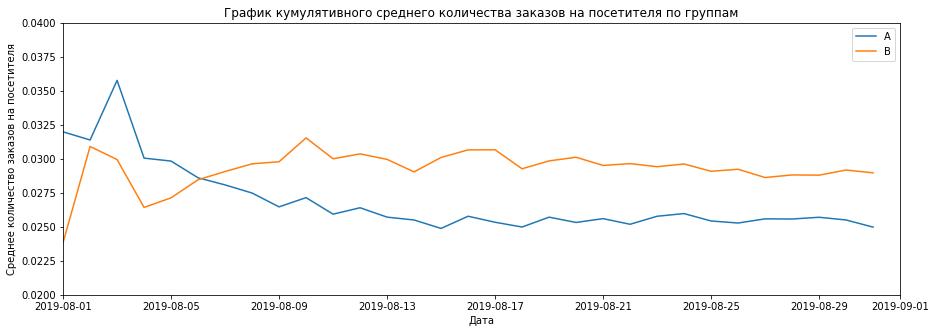

In [25]:
# считаем кумулятивную среднего количества заказов на посетителя по группам
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.02, 0.04])
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.legend()
plt.show()

В начале теста конверсия группы А была выше группы В, но спустя неделю конверсия группы В стала стабильно выше группы А на протяжении всего теста.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

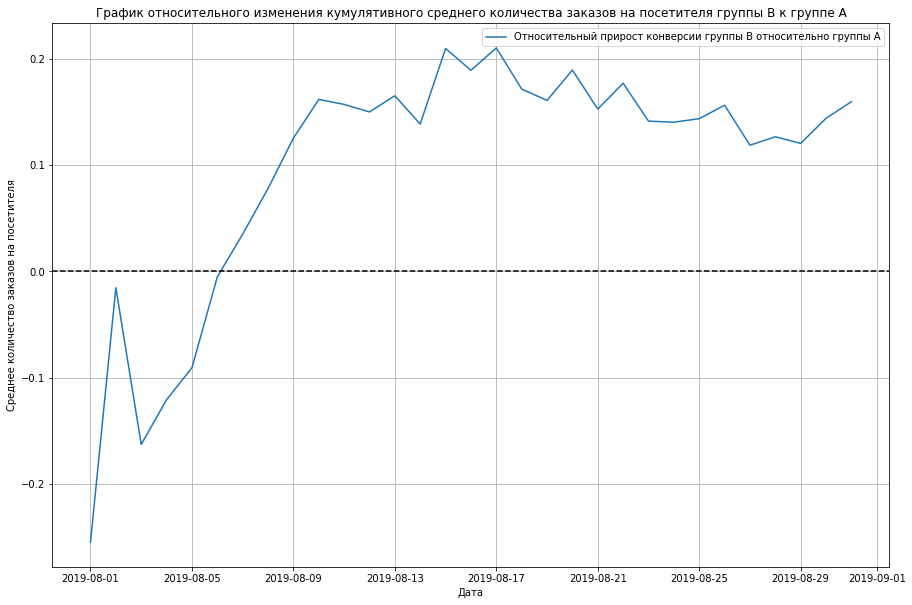

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

plt.figure(figsize=(15, 10))
plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
    label="Относительный прирост конверсии группы B относительно группы A"
)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.legend()
plt.grid()
plt.show()

График показывает что прирост конверсии начиная с 6 дня в группы В значительно выше групы А. Результаты группы В лучше рузальтатов группы А примерно на 15%

### Построим точечный график количества заказов по пользователям.

In [27]:
#для начала подсчитаем количество заказов по пользователям 
ordersByUsers = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))
ordersByUsers.columns = ['visitor_id', 'transaction_id']
ordersByUsers.sort_values(by='transaction_id', ascending=False).head(10)

,visitor_id,transaction_id
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


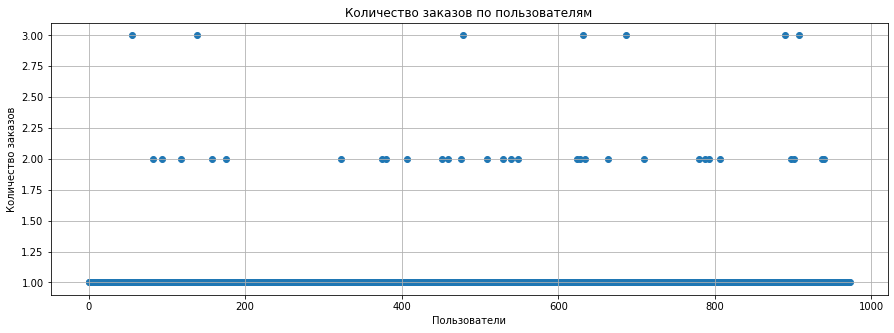

In [28]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15, 5))
plt.scatter(x_values, ordersByUsers['transaction_id'])
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title('Количество заказов по пользователям')
plt.grid()
plt.show()

От общего количества пользователей количество тех кто сделал более 2 заказов крафне мало.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [29]:
np.percentile(ordersByUsers['transaction_id'], [95, 99])

array([1., 2.])

Не более 5% пользователей делает больше 1 заказа. Не более 1% пользователей делает более 2 заказов.

### Построим точечный график стоимостей заказов.

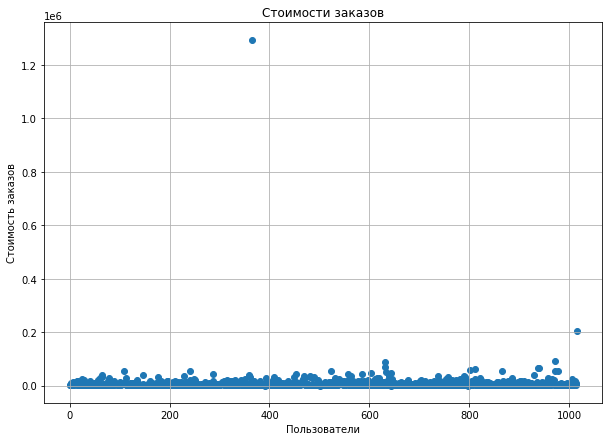

In [30]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10, 7))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.title("Стоимости заказов")
plt.grid()
plt.show()

На графике видно что есть 2 выбивающихся значения: в районе 200 тысяч и более 1млн. 

### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [31]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% пользователей потратили более 26785 и не более 1% пользователей потратили более 53904.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы:

H0:Статистически значимых отличий нет;

H1:Статистически значимые отличия есть.

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'transaction_id']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'transaction_id'] 
sampleA = pd.concat(
    [
        ordersByUsersA['transaction_id'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].
        sum() - len(ordersByUsersA['transaction_id'])), name='orders')],axis=0
)

sampleB = pd.concat(
    [
        ordersByUsersB['transaction_id'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].
        sum() - len(ordersByUsersB['transaction_id'])), name='orders')],axis=0
)
print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительные различия:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.011
Относительные различия: 0.160


Значение P-value менее 0.05, значит нулевую гипотезу можно отвергунть. "Серые" данные говорят о том, что в среднем количестве заказов статистически значимые отличия есть. Относительный прирост среднего группы В к конверсии группы А равен 16%

### Посчитайем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Сформулируем гипотезы:

H0:Статистически значимых отличий нет;

H1:Статистически значимые отличия есть.

In [33]:
print('P-value:','{0:.3f}'.format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
))

print('Относительные различия:','{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
)) 

P-value: 0.829
Относительные различия: 0.287


P-value значительно больше 0.05, а значит причин отвергать нулевую гипотезу нет. Впрочем, средний чек группы B значительно выше среднего чека группы A (на 28,7%). Это различие не является статистически значимым.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

95-й и 99-й перцентили средних чеков равны 26785 (5%) и 53904 (1%).

95-й и 99-й перцентили числа заказов на одного пользователя равны 1 (5%) и 2 (1%) заказам на пользователя.

Примем за аномальных пользователей тех, кто потратил более 54 тыс, либо совершил 2 и более заказов.

Удалять будем именно пользователей — сначала определим аномальные заказы. Затем пользователей, совершивших их, и добавим их в список аномальных.

Сформулируем гипотезу:

H0:Статистически значимых отличий нет;

H1:Статистически значимые отличия есть.

In [34]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transaction_id'] > 4]['visitor_id'],
        ordersByUsersB[ordersByUsersB['transaction_id'] > 4]['visitor_id'],
    ],
    axis=0,
)
revenue_lim = 54000
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.010
Относительные различия: 0.164


Значение P-value менее 0.05, значит статистически значимые отличия есть, как и в случае с "серыми" данными, поэтому нулевую гипотезу отвергаем. Относительный прирост равен 16,4%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Сформулируем гипотезу:

H0:Статистически значимых отличий нет;

H1:Статистически значимые отличия есть.

In [35]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.901
Относительные различия: -0.032


P-value значительно больше 0.05. Поэтому отвергнуть гипотезу не получилось. А вот средний чек группы B оказался незначительно (на 3,2%) ниже среднего чека группы A, в то время как по "сырым" данным он был больше на 28,7%и это различие так же не является статистически знасимым. Вот так ощутимо повлияли на результаты наши аномальные заказы с большими суммами.

### Вывод:
Проведя анализ A/B теста можно сделать следующие выводы:
1. График кумулятивного среднего чека по группам говорит о том, что результаты группы B лучше группы А примерно на 25%.
2. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A говорит о том, что результаты группы B лучше группы A на примерно 15%.
3. Есть статистически значимое различие в среднем количестве заказов на посетителя между группами как по "серым" данным, так и по "очищенным" данным.
4. Нет статистически значимого различия в среднем чеке заказа между группами ни по «сырым», ни по "очищенным" данным.

__На основании имеющихся данных можно сделать вывод что стоит остановить тест, потому что група В уже значительно превзошла группу А.__